In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Hapus kolom yang tidak perlu
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# mengubah nama kolom
df.columns =['labels', 'data']

In [8]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Membuat binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [10]:
# membagi data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33) 

In [11]:
# Mengonversi kalimat

MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)


In [12]:
# Mendapatkan kata - interger mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7219 unique tokens.


In [13]:
# mendapatkan N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 162)


In [14]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 162)


In [15]:
# Membuat model LSTM

# membuat embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

# Note: Ingin membuat ukuran dari embedding ke (V + 1) x D,
# Karena indeks pertama dimulai dari 1 dan tidak 0
# Dengan demikian, jika indeks akhir dari embedding matrix adalah V
# Maka harus punya ukuran V + 1

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [16]:
# Mengompile dan Menerapkan 
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print('Training model...')
train = model.fit(
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 12s 54ms/step - loss: 0.4521 - accuracy: 0.8645 - val_loss: 0.3395 - val_accuracy: 0.8690
Epoch 2/10
117/117 [==============================] - 5s 43ms/step - loss: 0.3168 - accuracy: 0.8645 - val_loss: 0.2877 - val_accuracy: 0.8690
Epoch 3/10
117/117 [==============================] - 6s 48ms/step - loss: 0.2318 - accuracy: 0.8647 - val_loss: 0.1967 - val_accuracy: 0.9163
Epoch 4/10
117/117 [==============================] - 6s 51ms/step - loss: 0.1469 - accuracy: 0.9767 - val_loss: 0.1413 - val_accuracy: 0.9728
Epoch 5/10
117/117 [==============================] - 6s 52ms/step - loss: 0.0967 - accuracy: 0.9909 - val_loss: 0.1118 - val_accuracy: 0.9750
Epoch 6/10
117/117 [==============================] - 8s 68ms/step - loss: 0.0675 - accuracy: 0.9930 - val_loss: 0.0991 - val_accuracy: 0.9755
Epoch 7/10
117/117 [==============================] - 8s 66ms/step - loss: 0.0480 - accuracy: 0.9952 - val_loss: 0.0924 - v

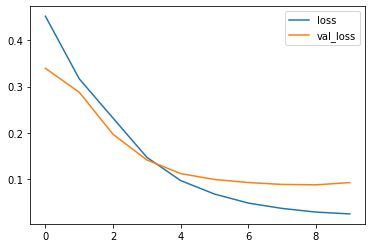

In [17]:
import matplotlib.pyplot as plt
plt.plot(train.history['loss'], label='loss')
plt.plot(train.history['val_loss'], label='val_loss')
plt.legend()

In [21]:
# MODEL CNN

# membuat embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

# Note: Ingin membuat ukuran dari embedding ke (V + 1) x D,
# Karena indeks pertama dimulai dari 1 dan tidak 0
# Dengan demikian, jika indeks akhir dari embedding matrix adalah V
# Maka harus punya ukuran V + 1

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [22]:
# Mengompile dan Menerapkan 
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print('Training model...')
trainCNN = model.fit(
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 14s 48ms/step - loss: 0.3938 - accuracy: 0.8604 - val_loss: 0.2798 - val_accuracy: 0.8690
Epoch 2/10
117/117 [==============================] - 5s 40ms/step - loss: 0.1535 - accuracy: 0.9360 - val_loss: 0.1236 - val_accuracy: 0.9685
Epoch 3/10
117/117 [==============================] - 4s 35ms/step - loss: 0.0241 - accuracy: 0.9938 - val_loss: 0.0763 - val_accuracy: 0.9842
Epoch 4/10
117/117 [==============================] - 4s 32ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.0802 - val_accuracy: 0.9837
Epoch 5/10
117/117 [==============================] - 4s 33ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.0873 - val_accuracy: 0.9831
Epoch 6/10
117/117 [==============================] - 4s 32ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0916 - val_accuracy: 0.9831
Epoch 7/10
117/117 [==============================] - 4s 36ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0905 - v

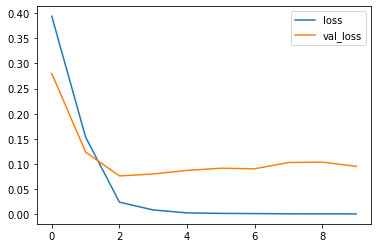

In [24]:
import matplotlib.pyplot as plt
plt.plot(trainCNN.history['loss'], label='loss')
plt.plot(trainCNN.history['val_loss'], label='val_loss')
plt.legend()

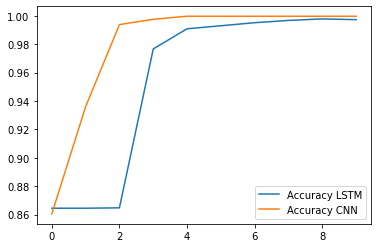

In [25]:
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'], label='Accuracy LSTM')
plt.plot(trainCNN.history['accuracy'], label='Accuracy CNN')
plt.legend()